<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Brain_Tumour_Classification_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing necessary libraries

In [1]:
# Basic necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import r2_score
from sklearn import preprocessing

print("All necessary packages are installed successfully!")

All necessary packages are installed successfully!


## 2. Importing the datasets

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/brain_tumor.csv',error_bad_lines=False)

df.head(10)

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,T64171,T54547,M95936,X54162,H57136,M10373,T55200,T46924,L11708,M18079,T46933,M98331,H54425,M76378,M26393,H59796,M82962,T55255,L13773,X53416.1,M63391,M63603,R33881,M95787,J03037,J02854,H37925,M83186,T72257,...,J03464.2,X54942,U17899,R36977,X05231,T87871.1,X72755,U33635,M26383,R83313.1,R32511,X54942.1,X17668,Z48481,T60780,U33286,H50438,L29254,M77349,R08183,X02530,L23808,M36821,D21262,T89991,M77836,H64555,M61832,J04765,D14657,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,25,14,34,54,27,2,4,-104,34,12,7,0,39,39,13,-11,7,0,6,50,85,205,23,-50,235,4,67,7,6,20,...,63,160,30,159,24,69,-2,66,114,35,62,98,4,141,260,96,31,73,143,287,1,27,137,96,-4,108,4,224,18,44,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,9,23,-2,-17,12,-9,-3,-25,17,-43,18,41,15,24,38,-2,-16,2,3,59,207,124,16,-6,102,13,70,5,14,-2,...,66,388,54,100,91,63,16,46,338,63,14,359,31,87,65,76,57,109,184,450,17,62,206,74,-2,106,31,198,24,110,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,4,6,5,-8,5,-11,13,-52,20,11,13,28,13,22,39,27,-2,5,3,48,87,108,16,29,98,19,30,2,25,29,...,56,258,46,94,64,51,113,40,122,53,48,193,82,113,203,90,81,43,87,421,61,73,196,77,-6,123,3,89,10,98,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,22,20,45,49,26,12,11,-88,25,22,15,19,2,27,44,9,11,17,3,64,628,197,28,29,280,4,84,7,18,27,...,79,177,82,87,51,45,42,34,59,34,27,57,14,135,72,127,69,20,337,370,20,70,119,28,4,51,155,154,36,54,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,-5,12,-7,4,4,-6,5,-68,21,50,-2,44,5,4,22,61,3,37,7,70,4,76,5,51,14,0,22,3,-55,0,...,47,250,20,91,15,29,67,23,40,61,22,288,111,-7,67,109,45,135,124,504,85,96,337,39,-4,122,-1,258,6,142,87,303,204,81,105,9,265,-2,126,tumor
5,5,21,-13,5,11,-18,78,4,143,14,-1,17,79,48,-31,15,-4,32,31,16,4,22,16,60,182,23,13,-4,1,21,198,177,45,21,268,7,133,-8,31,39,...,84,125,59,118,1,9,31,38,32,22,-10,46,6,36,73,24,5,35,158,180,24,26,-6,30,-5,54,11,13,83,2,51,3,131,38,10,4,3,9,145,tumor
6,6,225,118,-5,175,-40,108,54,272,32,3,41,-39,-74,17,-2,-3,-30,36,20,-3,32,7,17,211,-1,-1,13,11,33,262,291,33,26,250,-9,116,2,40,-4,...,45,96,46,235,33,23,40,98,241,55,27,66,1,66,-30,67,66,54,69,716,22,60,187,24,-11,67,-4,112,26,46,64,-3,142,55,202,-23,110,7,-14,tumor
7,7,-346,-35,37,42,39,18,14,28,34,-7,-5,104,-73,-11,-9,-27,-35,30,33,5,-36,15,5,74,-5,-8,10,-3,12,-42,100,16,-30,84,-15,67,7,-4,-32,...,84,69,50,201,28,28,33,47,102,47,50,56,5,75,61,40,11,16,961,243,12,63,52,12,4,67,9,12,248,15,84,-5,13,102,27,17,30,-5,-53,tumor
8,8,-378,31,-29,105,-54,19,-4,11,16,-9,57,-49,10,-41,-10,25,-14,0,70,17,8,8,65,99,51,-11,10,3,-647,-21,116,19,28,173,15,83,-10,36,-9,...,41,92,40,92,46,17,34,5,1383,85,17,55,-1,21,30,58,23,43,56,226,6,53,57,61,958,74,4,6,100,14,87,-4,110,25,18,15,97,0,-51,tumor
9,9,475,-79,20,41,10,65,-13,225,17,10,11,34,57,25,-8,-5,-23,80,3,17,35,1,39,17,37,15,18,0,29,345,240,21,-62,135,1,40,-1,-66,22,...,30,182,116,78,56,33,-2,30,174,-71,20,80,3,113,31,53,5,27,484,230,7,36,97,55,10,63,15,70,118,18,115,-4,95,47,41,-4,76,11,22,tumor


## 3. Removing Null


In [3]:
df.isnull().sum()

Unnamed: 0    0
X53416        0
M83670        0
X90908        0
M97496        0
             ..
M13699.1      0
X54489        0
T55008        0
M10065.2      0
y             0
Length: 7466, dtype: int64

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Columns: 7466 entries, Unnamed: 0 to y
dtypes: int64(7465), object(1)
memory usage: 2.1+ MB


## 4. Data exploration

In [5]:
df.columns

Index(['Unnamed: 0', 'X53416', 'M83670', 'X90908', 'M97496', 'X90908.1',
       'U37019', 'R48602', 'T96548', 'X64559',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'y'],
      dtype='object', length=7466)

In [6]:
df['y'].unique()

array(['tumor', 'Normal'], dtype=object)

In [7]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [8]:
label_encoder = preprocessing.LabelEncoder()
df['y']= label_encoder.fit_transform(df['y'])
df['y'].unique()

array([1, 0])

In [9]:
for i in df.columns:
    for each in df[i].values:
        
        if each > 1 or each < -1:
            df[i] = (df[i] - np.min(df[i]))/(np.max(df[i]) - np.min(df[i]))
        else:
            pass

In [10]:
y = df["y"]
X = df.drop(["y"],axis = 1)

## 5. Machine Learning Modelling

### i. Linear Regression

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [12]:
print(X_train.shape)
print(y_train.shape)

(25, 7464)
(25,)


### ii. Logistic Regression

In [13]:
log_reg=LogisticRegression(random_state=0,max_iter=900)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=900, random_state=0)

In [14]:
y_pred=log_reg.predict(X_test)
log_reg.score(X_test,y_test)

1.0

In [15]:
params = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
lr_model = LogisticRegression(random_state = 0)
lr_cv = GridSearchCV(lr_model,params,cv = 5).fit(X_train,y_train)
lr_cv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

{'C': 0.01, 'penalty': 'l2'}

In [16]:
log_reg2 = LogisticRegression(C = .01,random_state = 0,penalty= 'l2')
log_reg2.fit(X_train,y_train)

LogisticRegression(C=0.01, random_state=0)

In [17]:
log_reg2.predict(X_test)

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [18]:
log_reg2.score(X_test,y_test)

1.0

### iii. K-Nearest Neighbours Classifier

In [19]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
knn.score(X_test,y_test)

0.8181818181818182

### iv. Decision Tree

In [20]:
tree = DecisionTreeClassifier(random_state = 0).fit(X_train,y_train)
tree.score(X_test,y_test)

1.0

In [21]:
params = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50))}
tree_model = DecisionTreeClassifier(random_state = 0)
tree_cv = GridSearchCV(tree_model, params, cv = 10, n_jobs = -1).fit(X_train,y_train)
tree_cv.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [22]:
tree_tuned = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 7, min_samples_split = 2,random_state = 42).fit(X_train,y_train)
tree_tuned.score(X_test,y_test)

1.0

### v. Random Forest

In [23]:
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
rf.score(X_test,y_test)

1.0

### vi. Support Vector Machine

In [24]:
svm = SVC(random_state = 42).fit(X_train,y_train)
svm.score(X_test,y_test)

1.0

### vii. Gradient Boosting

In [25]:
gbm = GradientBoostingClassifier(random_state = 42).fit(X_train,y_train)
gbm.score(X_test,y_test)

1.0

In [26]:
gbm_tuned = GradientBoostingClassifier(max_depth = 2, learning_rate = 0.01, min_samples_split = 2, n_estimators = 100, random_state = 42).fit(X_train,y_train)
gbm_tuned.score(X_test,y_test)

1.0

### viii. AdaBoost

In [27]:
ada = AdaBoostClassifier(random_state = 42).fit(X_train,y_train)
ada.score(X_test,y_test)

1.0

In [28]:
ada_tuned = AdaBoostClassifier(learning_rate = 0.01,n_estimators = 1000,random_state = 42).fit(X_train,y_train)
ada_tuned.score(X_test,y_test)

1.0

### ix. Bagging

In [29]:
bag = BaggingClassifier(random_state = 42).fit(X_train,y_train)
bag.score(X_test,y_test)

1.0

In [30]:
bag_tuned = BaggingClassifier(n_estimators = 45,random_state = 42).fit(X_train,y_train)
bag_tuned.score(X_test,y_test)

1.0

## 6. Visualization of Results

Score :  1.0


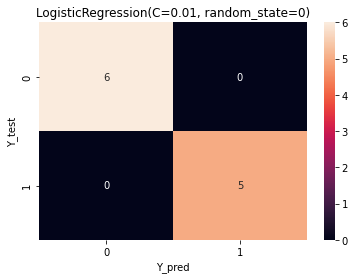

Score :  0.8181818181818182


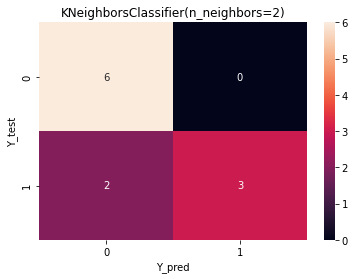

Score :  1.0


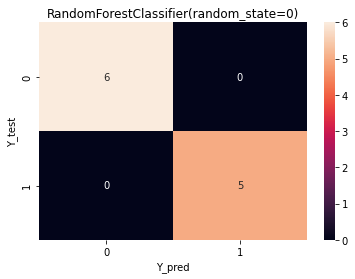

Score :  1.0


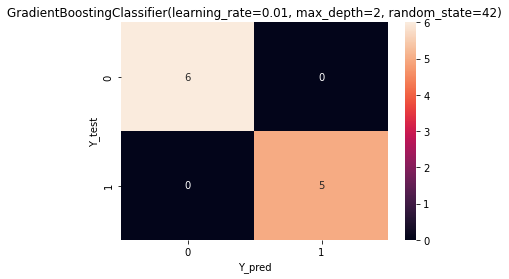

Score :  1.0


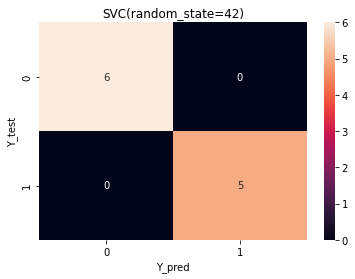

Score :  1.0


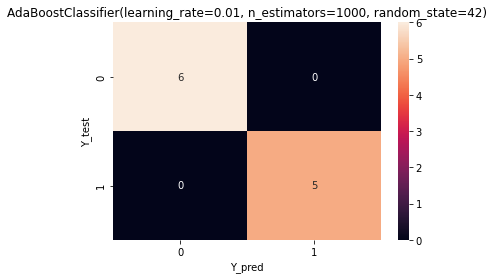

Score :  1.0


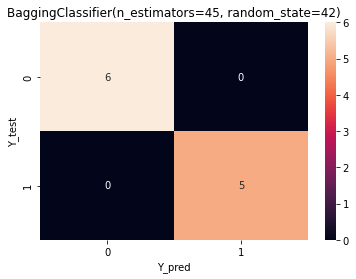

In [31]:
pred_list = [log_reg2,knn,rf,gbm_tuned,svm,ada_tuned,bag_tuned]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()